In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
df_main = pd.read_csv("df_sentences_fully_labeled_clean.csv")

In [45]:
df_buy = df_main.loc[df_main['ticker'] == df_main['ticker'].value_counts().idxmax()]
df_sell = df_main.loc[df_main['ticker'] == df_main['ticker'].value_counts().idxmax()]

In [50]:
df_buy = df_buy.loc[df_buy["Sentiment"] == "Buy"]
df_sell = df_sell.loc[df_sell["Sentiment"] == "Sell"]

In [51]:
df_buy['Dates'] = pd.to_datetime(df_buy['Time of Creation']).dt.date
df_sell['Dates'] = pd.to_datetime(df_sell['Time of Creation']).dt.date

In [52]:
df_buy = df_buy.drop('Time of Creation', axis = 1)
df_sell = df_sell.drop('Time of Creation', axis = 1)

In [53]:
df_buy = df_buy.groupby(df_buy["Dates"]).value_counts(ascending = True)
df_sell = df_sell.groupby(df_sell["Dates"]).value_counts(ascending = True)

In [54]:
df_main_ticker_buy = df_buy.reset_index()
df_main_ticker_sell = df_sell.reset_index()
df_main_ticker_buy.columns = ['Date', 'id', 'ticker', "Sentiment", "Count"]
df_main_ticker_sell.columns = ['Date', 'id', 'ticker', "Sentiment", "Count"]

In [55]:
df_main_ticker_buy

,Date,id,ticker,Sentiment,Count
0,2019-04-02,b8t1oe,GME,Buy,1
1,2019-04-07,banrt4,GME,Buy,1
2,2019-06-05,bx6x4m,GME,Buy,2
3,2019-06-06,bxdd2a,GME,Buy,3
4,2019-07-23,cgt32j,GME,Buy,1
...,...,...,...,...,...
5172,2022-10-31,yi8hax,GME,Buy,1
5173,2022-10-31,yierq5,GME,Buy,1
5174,2022-11-03,ylgurm,GME,Buy,1
5175,2022-11-03,ylemnh,GME,Buy,1


In [56]:
df_main_ticker_sell

,Date,id,ticker,Sentiment,Count
0,2020-09-01,ikrq8w,GME,Sell,1
1,2020-09-16,iu3j38,GME,Sell,1
2,2020-09-24,iz5d8d,GME,Sell,1
3,2020-09-25,izmg4v,GME,Sell,1
4,2020-10-16,jcjqba,GME,Sell,1
...,...,...,...,...,...
659,2022-09-02,x48zx9,GME,Sell,1
660,2022-09-04,x5z9wj,GME,Sell,1
661,2022-09-08,x9ik78,GME,Sell,1
662,2022-09-18,xhng55,GME,Sell,2


In [59]:
date_array_buy  = df_main_ticker_buy['Date']
Count_array_buy = df_main_ticker_buy['Count']
date_array_sell  = df_main_ticker_sell['Date']
Count_array_sell = df_main_ticker_sell['Count']

Count_array= [Count_array_buy, Count_array_sell]
Date_array = [date_array_buy, date_array_sell]

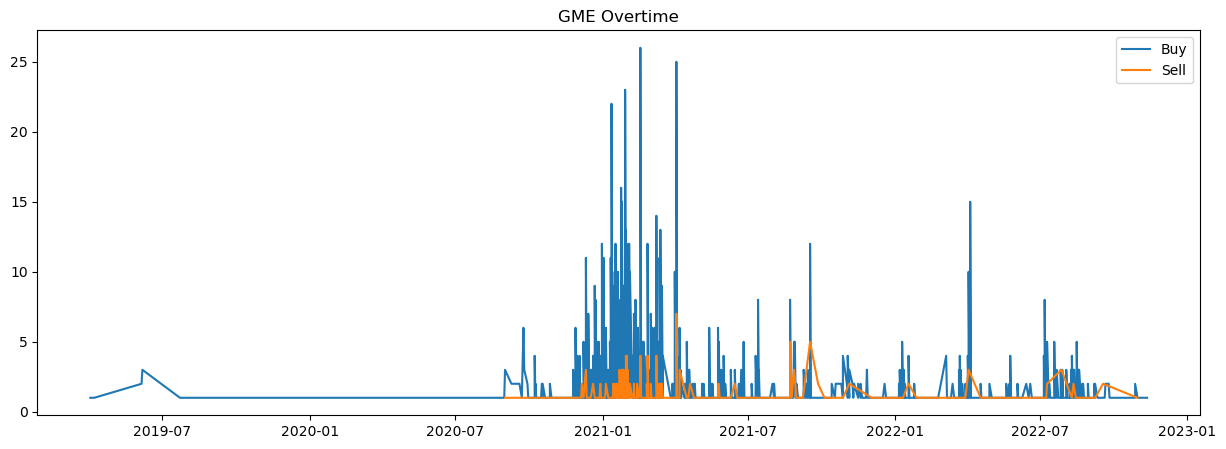

In [79]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.title("{}".format(df_main['ticker'].value_counts().idxmax()) + " Overtime")
ax.plot(date_array_buy,Count_array_buy , label = "Buy")
ax.plot(date_array_sell,Count_array_sell , label = "Sell")
ax.legend()
plt.show()